In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import warnings
from tqdm import tqdm
import seaborn as sns
random_state =537

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)
from prophet import Prophet

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("/kaggle/input/metu2023-dataset/final1.csv")

In [9]:
b_f = pd.DataFrame()
df_wc = df[(df["Kategori"]=="1")].copy()

for ii in set(df_wc.Brand.unique()):
    a =df_wc[(df_wc.Brand == ii)].iloc[:,4:].T
    b = pd.DataFrame(a.iloc[1:,:])
    for i in range(0,len(b.columns)):
        b.rename(columns = {b.columns[i]:a.iloc[0,i]}, inplace = True)
        
    print(ii,"::",b.shape) 
    b_f = pd.concat([b.reset_index(),b_f],axis=0,)


Y-i :: (36, 21)
X :: (36, 21)
Mavi :: (36, 21)
R :: (36, 21)
X-i :: (36, 21)
X-ii :: (36, 21)
KR :: (36, 21)
A :: (36, 21)
Y-ii :: (36, 21)
B :: (36, 21)
GT :: (36, 21)
Beyaz :: (36, 21)
Y :: (36, 21)
Y-iii :: (36, 21)
CK :: (36, 21)
M :: (36, 21)
GH :: (36, 21)
A-i :: (36, 21)
A-ii :: (36, 21)


In [111]:
b_f = b_f.drop(['Consideration','REPEATER Rate','Value (tl)',
       'QPB (gr)', 'SPB (gr)', 'PF (times)', 'TS (gr)', 'TV (tl)','Penetration'],axis=1).fillna(0).copy()

In [112]:
b_f= b_f.replace("-",0)
b_f.iloc[:,1:] = b_f.iloc[:,1:].astype(float)
b_f["Target"] = b_f.groupby(b_f.index).sum()["Volume (gr)"]
b_f["Target"] = (b_f["Volume (gr)"]/b_f["Target"]).replace(np.inf,0)
b_f.drop(["Volume (gr)"],axis=1,inplace=True)


In [113]:
b_f["index"] = b_f["index"].apply(lambda x:x.split(" ")[1])

In [114]:
b_f.fillna(0,inplace=True)

In [115]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(b_f.iloc[:,:-1], b_f.iloc[:,-1:], test_size=0.33,shuffle=False)

In [116]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
X_train["index"]=le.fit_transform(X_train["index"])
X_test["index"]=le.fit_transform(X_test["index"])

In [117]:
from sklearn.tree import DecisionTreeRegressor
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X_train, y_train)
regr_2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [118]:
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)


In [119]:
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_2)
print("MSE: ", mse)

r2_score(y_test, y_1),r2_score(y_test, y_2)

MSE:  0.0021782289682067434


(0.12233419955265856, 0.012283506357943064)

In [120]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)
score = xgbr.score(X_test, y_test)  
print("Test score: ", score)

Training score:  0.9998045651118844
Test score:  0.3506142891890217


<BarContainer object of 21 artists>

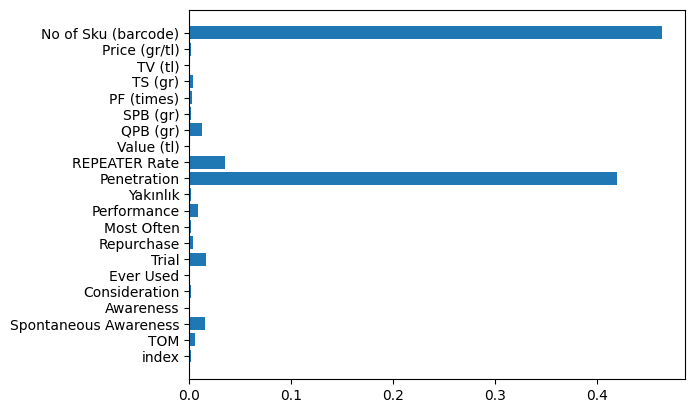

In [69]:
plt.barh(X_train.columns, xgbr.feature_importances_)

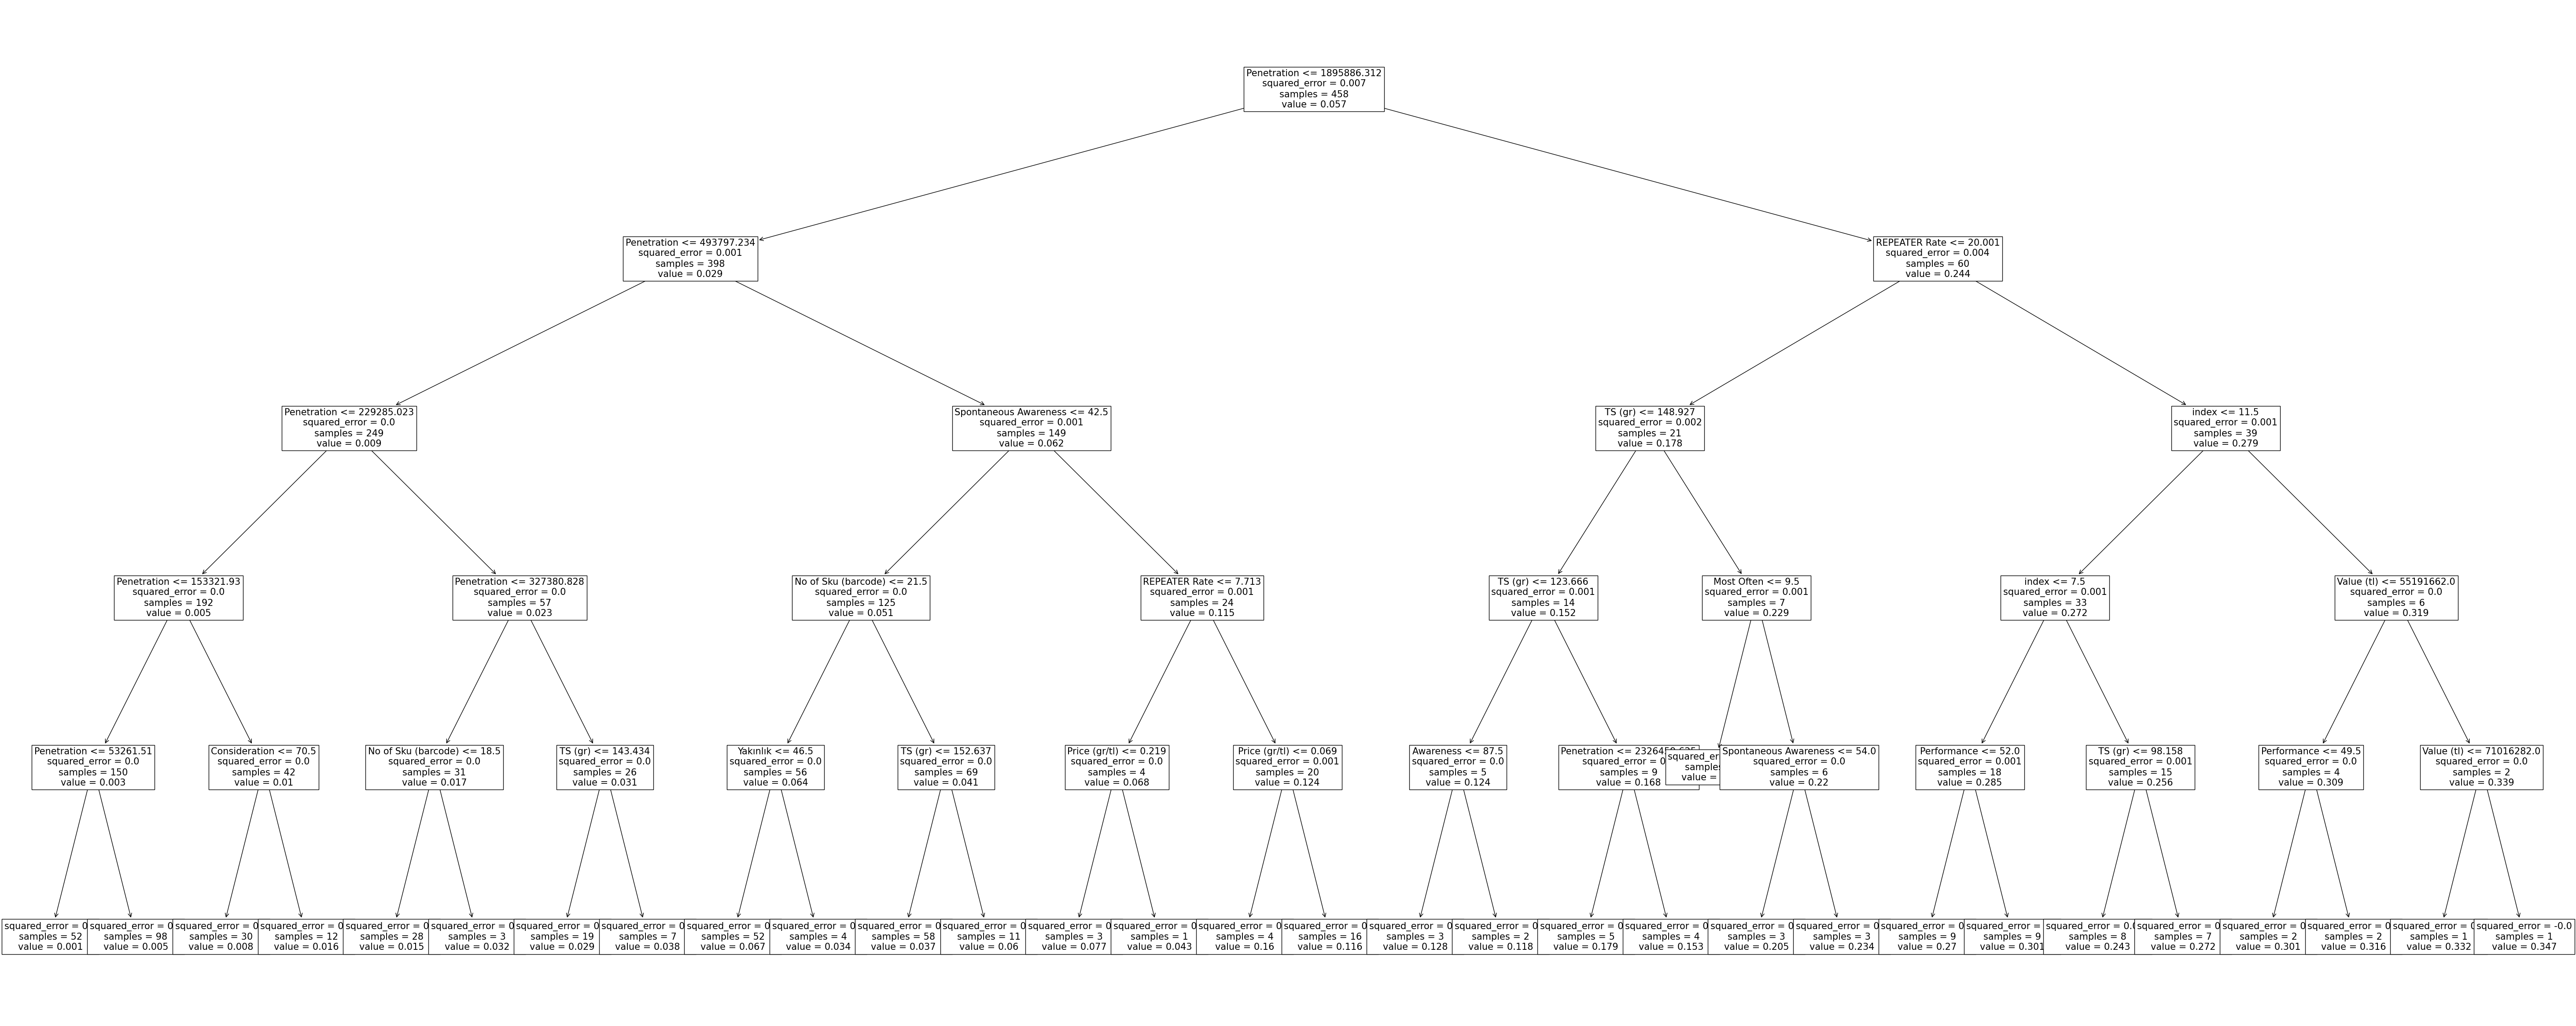

In [70]:
from sklearn import tree
plt.figure(figsize=(75,30))  # set plot size (denoted in inches)
tree.plot_tree(regr_2, fontsize=15,feature_names=X_train.columns,class_names="Market Value")

plt.show()